In [1]:
source(paste0(file.path("/","mnt","hadoop_tmp","working","Rcode"),"/",list.files(file.path("/","mnt","hadoop_tmp","working","Rcode"),pattern = "_proteome.r$")))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: httr

Loading required package: stringr

Loading required package: pbapply

Loading required package: reshape2


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




In [2]:
getwd()
path <- file.path("/","mnt","hadoop_tmp","working","2022 YEO","2023_BV2_siIft88_CD63IP_Exo_220818")
rawPD<-list.files(path, pattern = "_Proteins.txt$")
#infoPD<-list.files(path, pattern = "_InputFiles.txt$")
print(rawPD)
#path1 <- system.file("extdata", package="wrProteo")
#fiNaPd <- "pxd001819_PD24_Proteins.txt.gz"

[1] "/mnt/hadoop_tmp/working/2022 YEO/2023_BV2_siIft88_CD63IP_Exo_220818"

[1] "230316_ANOVA_Abundance_220818_B_siI_Exo_CD63IP-(1)_Proteins.txt"


In [3]:
datafromPD<-lapply(rawPD, function(file){
  return(fread(paste0(path,"/",file)))
})



require(stringr)
for(i in seq_len(length(datafromPD))){
  colnames(datafromPD[[i]])<-str_replace_all(colnames(datafromPD[[i]]),"[ ]",".")
  colnames(datafromPD[[i]])<-str_replace_all(colnames(datafromPD[[i]]),"[-]","_")
}

counts<-lapply(datafromPD, function(data){
  cts<-data %>% base::subset(select = c("Accession",grep("^Abundances.Normalized.", colnames(data), value=TRUE))) 
  return(cts)
})

In [4]:
k = 1 # select number number from "print(rawPD)"
colnames(counts[[k]])

[1] "Accession"                                     
 [2] "Abundances.Normalized.F1.Sample.Con"           
 [3] "Abundances.Normalized.F2.Sample.Con"           
 [4] "Abundances.Normalized.F3.Sample.Con"           
 [5] "Abundances.Normalized.F4.Sample.Con"           
 [6] "Abundances.Normalized.F5.Sample.Con_Abeta"     
 [7] "Abundances.Normalized.F6.Sample.Con_Abeta"     
 [8] "Abundances.Normalized.F7.Sample.Con_Abeta"     
 [9] "Abundances.Normalized.F8.Sample.Con_Abeta"     
[10] "Abundances.Normalized.F9.Sample.siIft88"       
[11] "Abundances.Normalized.F10.Sample.siIft88"      
[12] "Abundances.Normalized.F11.Sample.siIft88"      
[13] "Abundances.Normalized.F12.Sample.siIft88"      
[14] "Abundances.Normalized.F13.Sample.siIft88_Abeta"
[15] "Abundances.Normalized.F14.Sample.siIft88_Abeta"
[16] "Abundances.Normalized.F15.Sample.siIft88_Abeta"
[17] "Abundances.Normalized.F16.Sample.siIft88_Abeta"

In [5]:
############# Modify variables based on "colnames(counts[[k]])"
y.count<-list("Control"=subset(counts[[k]], select = c("Accession",grep("_Con$", colnames(counts[[k]]), value=TRUE))),
              "Con+Abeta"=subset(counts[[k]], select = c("Accession",grep("Con_Abeta$", colnames(counts[[k]]), value=TRUE))),
              "siIft88"=subset(counts[[k]], select = c("Accession",grep("_siIft88", colnames(counts[[k]]), value=TRUE))),
              "siIft88+Abeta"=subset(counts[[k]], select = c("Accession",grep("_siIft88_Abeta$", colnames(counts[[k]]), value=TRUE))))

Loading required package: ggVennDiagram



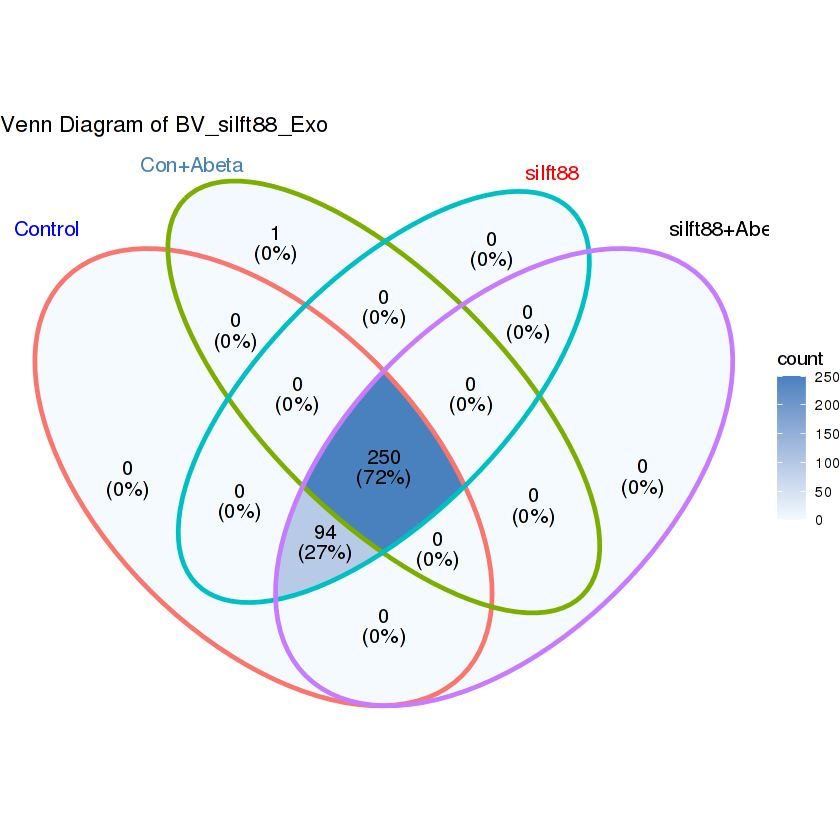

In [6]:
y <- list("Control"= y.count[[1]]$Accession[unique(c(unlist(apply(y.count[[1]], 2, function(x) which(!is.na(x)))[-1])))],
          "Con+Abeta"= y.count[[2]]$Accession[unique(c(unlist(apply(y.count[[2]], 2, function(x) which(!is.na(x)))[-1])))],
          "siIft88"= y.count[[3]]$Accession[unique(c(unlist(apply(y.count[[3]], 2, function(x) which(!is.na(x)))[-1])))],
           "siIft88+Abeta"= y.count[[4]]$Accession[unique(c(unlist(apply(y.count[[4]], 2, function(x) which(!is.na(x)))[-1])))])

require(ggVennDiagram)
p<-ggVennDiagram(y, label_alpha = 0, 
          color =  c("A" = "blue","B" ="steelblue","C" = "red", "'D" = "black") ,
          set_color = c("A" = "blue","B" ="steelblue", "C" = "red", "D" = "black")) + 
#                                                                      scale_fill_distiller(palette = "RdBu")+
    scale_fill_gradient(low = "#F4FAFE", high = "#4981BF")              +
    ggtitle("Venn Diagram of BV_siIft88_Exo")
print(p)
                                                                     
ggsave(paste0(path,"/results/Figure_vennALL.pdf"), p, width =5, height =5, units = "in", device = "pdf", dpi = 600)

In [7]:
############# Modify variables based on "colnames(counts[[k]])"
y.count<-list("Con+Abeta"=subset(counts[[k]], select = c("Accession",grep("Con_Abeta$", colnames(counts[[k]]), value=TRUE))),
              "siIft88+Abeta"=subset(counts[[k]], select = c("Accession",grep("_siIft88_Abeta$", colnames(counts[[k]]), value=TRUE))))

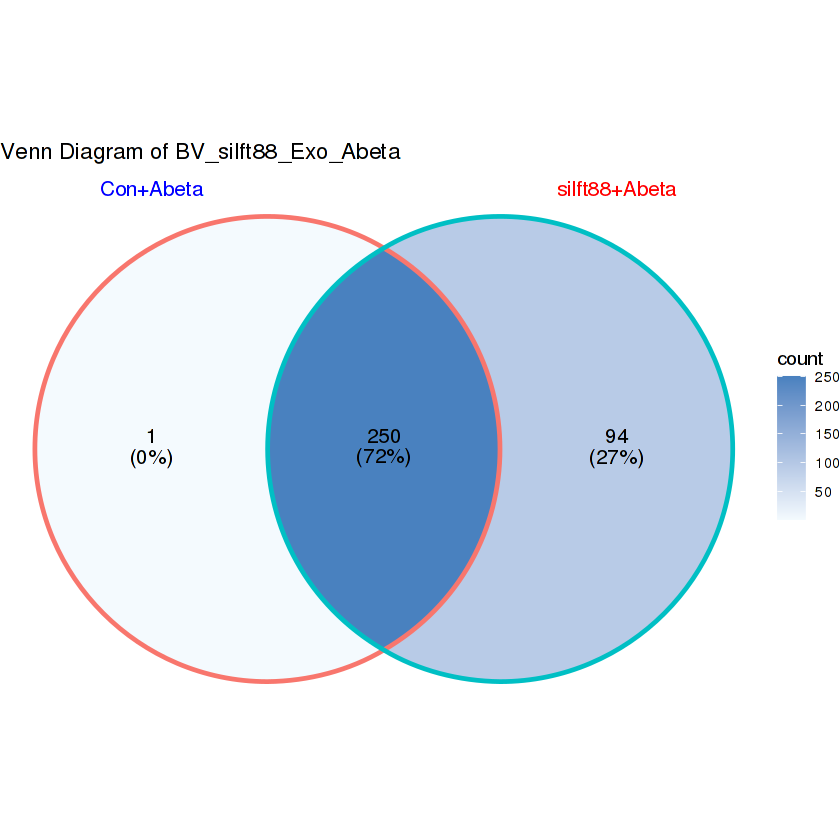

In [8]:
y <- list("Con+Abeta"= y.count[[1]]$Accession[unique(c(unlist(apply(y.count[[1]], 2, function(x) which(!is.na(x)))[-1])))],
          "siIft88+Abeta"= y.count[[2]]$Accession[unique(c(unlist(apply(y.count[[2]], 2, function(x) which(!is.na(x)))[-1])))])

require(ggVennDiagram)
p<-ggVennDiagram(y, label_alpha = 0, 
          color =  c("A" = "blue","B" ="red") ,
          set_color = c("A" = "blue","B" ="red")) + 
#                                                                      scale_fill_distiller(palette = "RdBu")+
    scale_fill_gradient(low = "#F4FAFE", high = "#4981BF")              +
    ggtitle("Venn Diagram of BV_siIft88_Exo_Abeta")
print(p)
                                                                     
ggsave(paste0(path,"/results/Figure_vennAbeta.pdf"), p, width =5, height =5, units = "in", device = "pdf", dpi = 600)

In [9]:
resultUNIPROT <- pbapply::pblapply(datafromPD[[k]]$Accession,function(ids){ #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
    data <- uniprot_mapping(ids)
    content(data, as= "text", encoding = 'UTF-8')
    res<-unlist(str_split(unlist(str_split(unlist(str_split(content(data, as= "text", encoding = 'UTF-8'),"\\t")),"\\n"))[4]," "))[1]
    return(res)
  })
  
  results_from_uniprot <- data.frame('Accession' = datafromPD[[k]]$Accession,  #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
                                     'Gene.names' = unlist(resultUNIPROT))
  require(stringi)
  # str_sub(datafromPD[[k]]$Description[1], #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  #         str_locate(datafromPD[[k]]$Description[1],pattern = "GN=")[2]+1, #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  #         str_locate(datafromPD[[k]]$Description[1],pattern = "PE=")[1]-2) #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  # seq_len(length(dataPD$Description))
  result<-lapply(datafromPD[[k]]$Description, function(desc){ #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
    # str_sub(grep("GN=",unlist(str_split(desc, " ")), value = TRUE),start = 4L)
    str_sub(desc, 
            str_locate(desc,pattern = "GN=")[2]+1,
            str_locate(desc,pattern = "PE=")[1]-2)
  })
  
  result<-make.unique(unlist(result))
  
  results_from_datasheet <- data.frame('Protein.IDs' = datafromPD[[k]]$"Accession",  'Gene.names' = result) #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  results_from_uniprot <- na.omit(results_from_uniprot)
  results_from_uniprot$Gene.names[which(results_from_uniprot$Gene.names=="")] <- result[which(datafromPD[[k]]$"Accession" %in% results_from_uniprot$Accession[which(results_from_uniprot$Gene.names=="")])]
  
  dat<-merge(counts[[k]], results_from_uniprot, by = "Accession")
  
  data_unique <- make_unique(dat, "Gene.names", "Accession", delim = ";")

  |::::::::::::::::::::::::::::::::::::::::::::::::::| 100%


Loading required package: stringi



In [10]:
############# Part 2. Not imputed
data <-  merge(datafromPD[[k]], results_from_uniprot, by = "Accession")

data.merged_neo <- subset(data, select=c("Gene.names","Accession",grep("^Abundance.Ratio.log2.|^Abundance.Ratio.Weight.|^Abundance.Ratio.Adj.P_Value",colnames(data), value = TRUE)))

colnames(data.merged_neo)

[1] "Gene.names"                                          
 [2] "Accession"                                           
 [3] "Abundance.Ratio.log2.Con_Abeta..Con"                 
 [4] "Abundance.Ratio.log2.siIft88..Con"                   
 [5] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"       
 [6] "Abundance.Ratio.log2.siIft88_Abeta..siIft88"         
 [7] "Abundance.Ratio.Adj.P_Value.Con_Abeta..Con"          
 [8] "Abundance.Ratio.Adj.P_Value.siIft88..Con"            
 [9] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"
[10] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..siIft88"

In [30]:
data_export <- subset(data, select=c("Gene.names","Accession",grep("^Abundance.Ratio.log2.|^Abundance.Ratio.P_Value|^Abundance.Ratio.Adj.P_Value",colnames(data), value = TRUE))) 
data_exports <-subset(data_export, select=c("Gene.names","Accession",grep("siIft88_Abeta..Con_Abeta$",colnames(data_export), value = TRUE)))

require(xlsx)
write.xlsx(data_exports, paste0(path,"/results/Figure7e_BVsiIft88_CD63IP_Exosome.xlsx"))

Loading required package: xlsx



In [12]:
objDat <- subset(data.merged_neo, select=c("Gene.names","Accession",grep("siIft88_Abeta..Con_Abeta$",colnames(data.merged_neo), value = TRUE)))

print(colnames(objDat))

colnames(objDat)<- c('Gene.names','Accession','Abundance.Ratio.log2','Abundance.Ratio.P_Value')


[1] "Gene.names"                                          
[2] "Accession"                                           
[3] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"       
[4] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"


In [13]:
insGenes <- objDat %>% dplyr::filter(Abundance.Ratio.log2 > 0.25 & Abundance.Ratio.P_Value < 0.05) %>% pull(Gene.names)
insGenes.n <- objDat %>% dplyr::filter(Abundance.Ratio.log2 < -0.25 & Abundance.Ratio.P_Value < 0.05) %>% pull(Gene.names)

In [36]:
na.omit(insGenes) %>% length()
na.omit(insGenes.n) %>% length()

[1] 75

[1] 8

In [14]:
library(enrichR)
library(httr)
# Check available databases to perform enrichment (then choose one)
databases <- enrichR::listEnrichrDbs()$libraryName

# insGenes <- mg.subset.DE[[id]] %>% dplyr::filter(p_val < 0.01  & avg_log2FC < -0.25) %>% rownames()



Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!



In [15]:
enrich_results <- enrichr(genes = insGenes, databases = grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE)[c(28, 34, 36:38)])
enrich_results.n <- enrichr(genes = insGenes.n, databases = grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE)[c(28, 34, 36:38)])

Uploading data to Enrichr... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying Reactome_2022... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying Reactome_2022... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.


In [16]:
enrich_result.p <- rbind(cbind(enrich_results[[1]],"group"="KEGG"),
                         cbind(enrich_results[[2]],"group"="reactome"),
                         cbind(enrich_results[[3]],"group"="GO-BP"),
                         cbind(enrich_results[[4]],"group"="GO-CC")) %>% 
                        mutate("Genesize" = (str_split_i(Overlap, "\\/",1))) %>%
                        dplyr::filter(Genesize > 2 & P.value < 0.01)
                         #cbind(enrich_results[[5]][grep("phagocy|cili|Cili|Phagocy||lysosom|Lysosom|secre|Secre|exocy|Exocy|exosom|Exosom", enrich_results[[5]] %>% dplyr::filter(P.value <0.1)  %>% pull(Term)),],"group"="GO-MF")
enrich_result.p$Term

[1] "Ribosome"                                                                                      
  [2] "RNA transport"                                                                                 
  [3] "Phagosome"                                                                                     
  [4] "HIF-1 signaling pathway"                                                                       
  [5] "Glycolysis / Gluconeogenesis"                                                                  
  [6] "Gap junction"                                                                                  
  [7] "Peptide Chain Elongation R-HSA-156902"                                                         
  [8] "L13a-mediated Translational Silencing Of Ceruloplasmin Expression R-HSA-156827"                
  [9] "Translation R-HSA-72766"                                                                       
 [10] "GTP Hydrolysis And Joining Of 60S Ribosomal Subunit R-HSA-72706"                               
 [11] "Eukaryotic Translation Elongation R-HSA-156842"                                                
 [12] "Selenoamino Acid Metabolism R-HSA-2408522"                                                     
 [13] "Cap-dependent Translation Initiation R-HSA-72737"                                              
 [14] "Formation Of A Pool Of Free 40S Subunits R-HSA-72689"                                          
 [15] "Selenocysteine Synthesis R-HSA-2408557"                                                        
 [16] "Influenza Infection R-HSA-168255"                                                              
 [17] "Regulation Of Expression Of SLITs And ROBOs R-HSA-9010553"                                     
 [18] "Signaling By ROBO Receptors R-HSA-376176"                                                      
 [19] "Metabolism Of Proteins R-HSA-392499"                                                           
 [20] "Metabolism Of Amino Acids And Derivatives R-HSA-71291"                                         
 [21] "Axon Guidance R-HSA-422475"                                                                    
 [22] "Nervous System Development R-HSA-9675108"                                                      
 [23] "Infectious Disease R-HSA-5663205"                                                              
 [24] "Metabolism Of RNA R-HSA-8953854"                                                               
 [25] "Developmental Biology R-HSA-1266738"                                                           
 [26] "Cellular Responses To Stress R-HSA-2262752"                                                    
 [27] "Cellular Responses To Stimuli R-HSA-8953897"                                                   
 [28] "Metabolism R-HSA-1430728"                                                                      
 [29] "Disease R-HSA-1643685"                                                                         
 [30] "Formation Of Tubulin Folding Intermediates By CCT/TriC R-HSA-389960"                           
 [31] "Cooperation Of Prefoldin And TriC/CCT In Actin And Tubulin Folding R-HSA-389958"               
 [32] "Folding Of Actin By CCT/TriC R-HSA-390450"                                                     
 [33] "Prefoldin Mediated Transfer Of Substrate To CCT/TriC R-HSA-389957"                             
 [34] "BBSome-mediated Cargo-Targeting To Cilium R-HSA-5620922"                                       
 [35] "Chaperonin-mediated Protein Folding R-HSA-390466"                                              
 [36] "Protein Folding R-HSA-391251"                                                                  
 [37] "Cooperation Of PDCL (PhLP1) And TRiC/CCT In G-protein Beta Folding R-HSA-6814122"              
 [38] "Association Of TriC/CCT With Target Proteins During Biosynthesis R-HSA-390471"                 
 [39] "Protein Methylation R-HSA-8876725"                                               

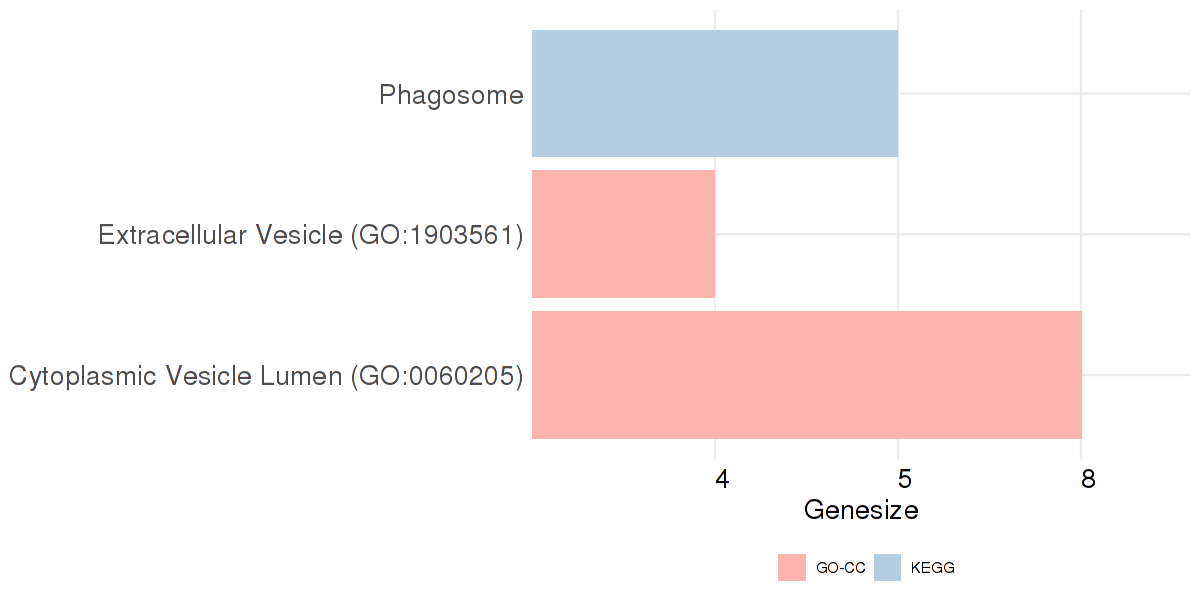

In [24]:
options(repr.plot.width=10, repr.plot.height=5)

require(forcats)

ggplot(enrich_result.p[grep("Phagosome|Cytoplasmic Vesicle|Extracellular Vesicle|Phagosome",enrich_result.p$Term),], aes(Genesize, fct_reorder(Term, group),  fill=group)) + 
 geom_col(orientation='y') + 
    #scale_fill_grey(start = 0, end = .9)+
        # xlim(-2.5,2.5)+
    # scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
scale_fill_brewer(palette = "Pastel1")+
    theme_minimal() + ylab(NULL) +
     theme(legend.position="bottom",
                axis.text.x = element_text(size = 16, hjust = 0, colour = "black"),
                axis.text.y = element_text(size = 16),
                axis.title = element_text(size = 16),
                legend.title = element_blank(),
                legend.background = element_blank())

In [18]:
enrich_result.n <- rbind(cbind(enrich_results.n[[1]],"group"="KEGG"),
                         cbind(enrich_results.n[[2]],"group"="reactome"),
                         cbind(enrich_results.n[[3]],"group"="GO-BP"),
                         cbind(enrich_results.n[[4]],"group"="GO-CC")) %>% 
                        mutate("Genesize" = (str_split_i(Overlap, "\\/",1))) %>%
                        dplyr::filter(Genesize > 2 & P.value < 0.01)
                         #cbind(enrich_results[[5]][grep("phagocy|cili|Cili|Phagocy||lysosom|Lysosom|secre|Secre|exocy|Exocy|exosom|Exosom", enrich_results[[5]] %>% dplyr::filter(P.value <0.1)  %>% pull(Term)),],"group"="GO-MF")
enrich_result.n$Term

[1] "Signaling By Rho GTPases R-HSA-194315"                           
[2] "Signaling By Rho GTPases, Miro GTPases And RHOBTB3 R-HSA-9716542"
[3] "Vacuolar Lumen (GO:0005775)"

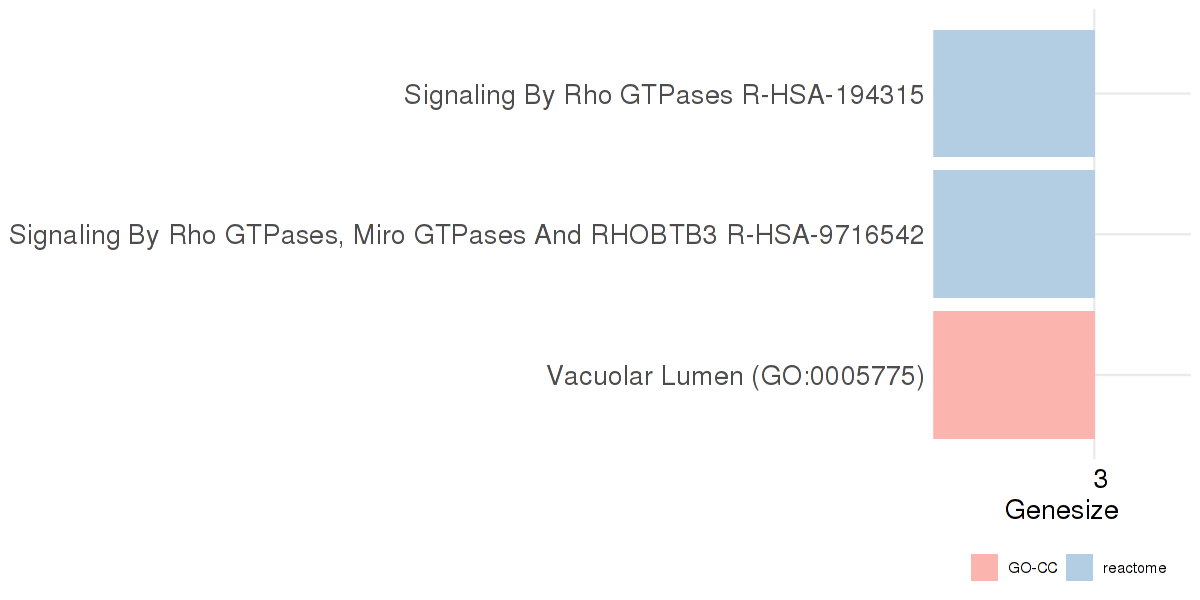

In [20]:
options(repr.plot.width=10, repr.plot.height=5)
require(forcats)

ggplot(enrich_result.n[grep("Signaling By Rho GTPases|Vacuolar Lumen",enrich_result.n$Term),], aes(Genesize, fct_reorder(Term, group),  fill=group)) + 
 geom_col(orientation='y') + 
    #scale_fill_grey(start = 0, end = .9)+
        # xlim(-2.5,2.5)+
    # scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
scale_fill_brewer(palette = "Pastel1")+
    theme_minimal() + ylab(NULL) +
     theme(legend.position="bottom",
                axis.text.x = element_text(size = 16, hjust = 0, colour = "black"),
                axis.text.y = element_text(size = 16),
                axis.title = element_text(size = 16),
                legend.title = element_blank(),
                legend.background = element_blank())

In [26]:
require(nichenetr)

group1_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Phagosome",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("App","Tuba1b","Psmd12","Psmd7")
group2_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Cytoplasmic Vesicle",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Eef1a1","Vcp","Pkm","Hsp90ab1")
group3_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Extracellular Vesicle",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Eif4a1","Rps8","Rps6","Rps3a")
group4_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Signaling By Rho GTPases",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Cct6a","Cct2")
group5_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Vacuolar",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Sdc4","Fgg","Fbln1")

Loading required package: nichenetr

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [35]:
print(group1_genes)
print(group2_genes)
print(group3_genes)
print(group4_genes)
print(group5_genes)

  TUBA1B     <NA>     TFRC   TUBB4B     ACTB 
"Tuba1b"       NA   "Tfrc" "Tubb4b"   "Actb" 
    EEF1A1        VCP   HSP90AB1        PKM      PSMC2       CCT8       EEF2 
  "Eef1a1"      "Vcp" "Hsp90ab1"      "Pkm"    "Psmc2"     "Cct8"     "Eef2" 
      APRT 
    "Aprt" 
     PKM     TFRC     CLTC   TUBB4B 
   "Pkm"   "Tfrc"   "Cltc" "Tubb4b" 
  CCT6A    CCT2    <NA> 
"Cct6a"  "Cct2"      NA 
  SDCBP    CCT2    SDC4 
"Sdcbp"  "Cct2"  "Sdc4" 


In [29]:
enrich_result.p[grep("Phagosome|Cytoplasmic Vesicle|Extracellular Vesicle|Phagosome",enrich_result.p$Term),]
enrich_result.n[grep("Signaling By Rho GTPases|Vacuolar Lumen",enrich_result.n$Term),]

-log10(enrich_result.p$Adjusted.P.value[grep("Phagosome|Cytoplasmic Vesicle|Extracellular Vesicle|Phagosome",enrich_result.p$Term)])
-log10(enrich_result.n$Adjusted.P.value[grep("Signaling By Rho GTPases|Vacuolar Lumen",enrich_result.n$Term)])

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,group,Genesize
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
3,Phagosome,5/180,5.793257e-04,1.231723e-02,0,0,8.061224,60.08551,TUBA1B;TUBB5;TFRC;TUBB4B;ACTB,KEGG,5
129,Cytoplasmic Vesicle Lumen (GO:0060205),8/115,1.143448e-08,9.052300e-08,0,0,22.115218,404.41286,EEF1A1;VCP;HSP90AB1;PKM;PSMC2;CCT8;EEF2;APRT,GO-CC,8
138,Extracellular Vesicle (GO:1903561),4/60,7.585808e-05,2.944771e-04,0,0,19.988934,189.62794,PKM;TFRC;CLTC;TUBB4B,GO-CC,4


,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,group,Genesize
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Signaling By Rho GTPases R-HSA-194315,3/644,1.648603e-03,0.0213796127,0,0,18.11326,116.0666,CCT6A;CCT2;H2AC7,reactome,3
2,"Signaling By Rho GTPases, Miro GTPases And RHOBTB3 R-HSA-9716542",3/660,1.769347e-03,0.0213796127,0,0,17.65753,111.8983,CCT6A;CCT2;H2AC7,reactome,3
3,Vacuolar Lumen (GO:0005775),3/161,2.783468e-05,0.0006680322,0,0,75.31899,790.0380,SDCBP;CCT2;SDC4,GO-CC,3


[1] 1.909487 7.043241 3.530948

[1] 1.670000 1.670000 3.175203

Warning message:
“Removed 130 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 130 rows containing missing values (`geom_point()`).”


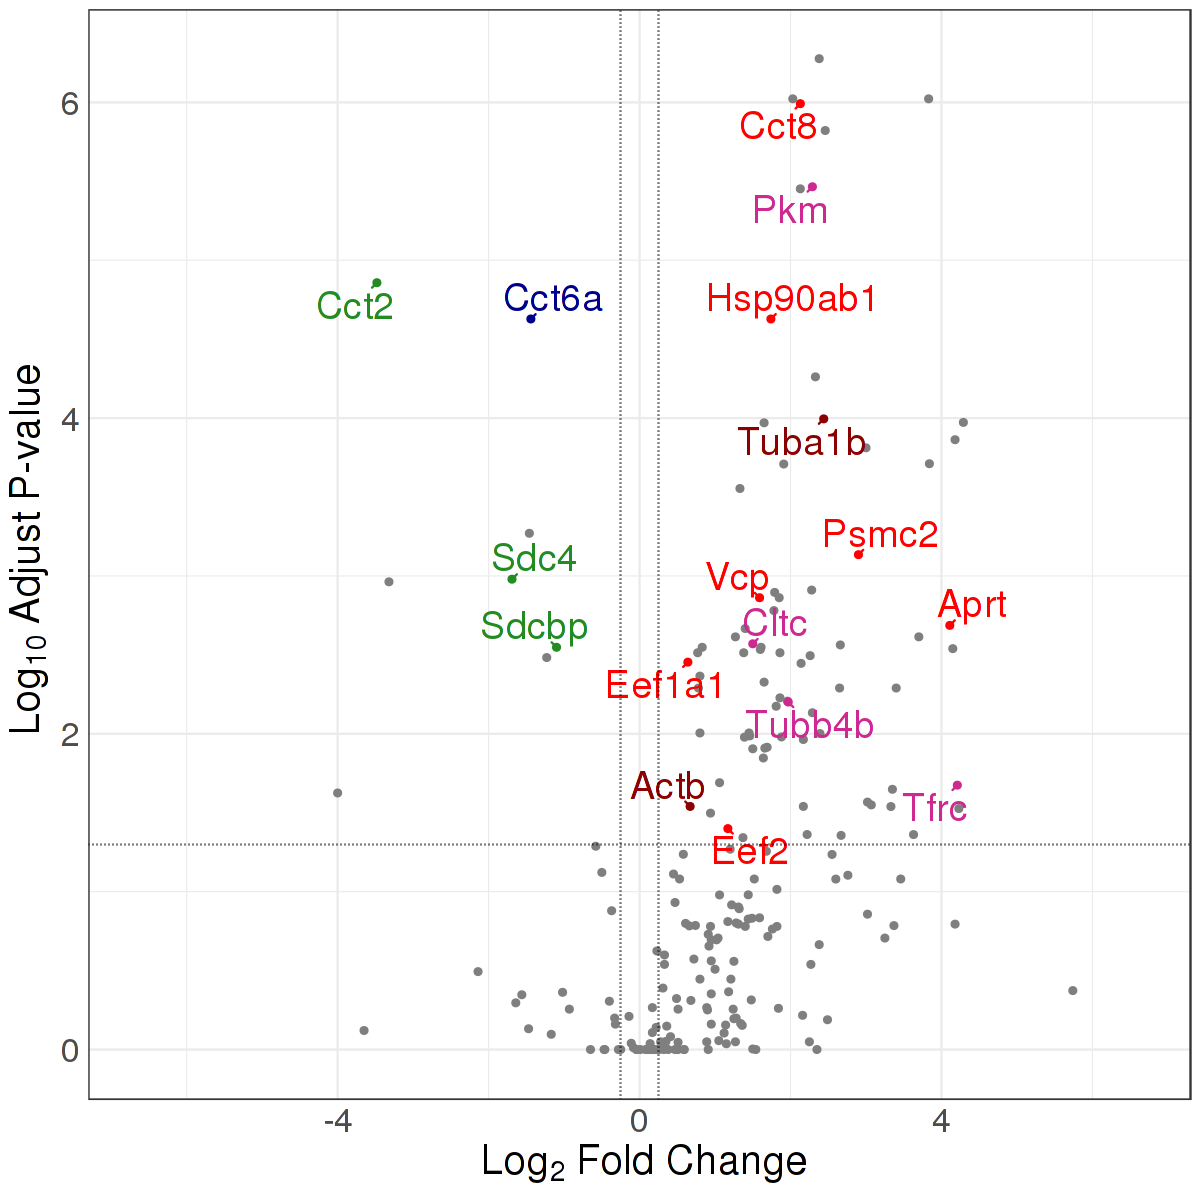

In [28]:

# options(repr.plot.width = 16, repr.plot.height = 16)
keyvals.colour <- c()
keyvals.colour <- ifelse(objDat$Gene.names %in% group1_genes, 'darkred', 'grey50')
keyvals.colour[objDat$Gene.names %in% group2_genes] <- "red"
keyvals.colour[objDat$Gene.names %in% group3_genes] <- "maroon3"
keyvals.colour[objDat$Gene.names %in% group4_genes] <- "blue4"
keyvals.colour[objDat$Gene.names %in% group5_genes] <- "forestgreen"
keyvals.colour[is.na(keyvals.colour)] <- 'grey70'

names(keyvals.colour)[keyvals.colour == 'grey70'] <- 'ns'
names(keyvals.colour)[keyvals.colour == 'darkred'] <- 'Group 1'
names(keyvals.colour)[keyvals.colour == 'red'] <- 'Group 2'
names(keyvals.colour)[keyvals.colour == 'maroon3'] <- 'Group 3'
names(keyvals.colour)[keyvals.colour == 'blue4'] <- 'Group 4'
names(keyvals.colour)[keyvals.colour == 'forestgreen'] <- 'Group 5'



objDat$group <- names(keyvals.colour)
options(repr.plot.width=10, repr.plot.height=10)
require(RColorBrewer)
require(ggrepel)

p1<-ggplot(objDat, aes(x=Abundance.Ratio.log2, y=-log10(Abundance.Ratio.P_Value), color =group)) + 
  geom_point() +
  geom_text_repel(data = objDat[objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes,group5_genes)  ,],
                  aes(label=Gene.names), 
                  size = 8,
                  fontface = "italic", 
                  arrow = arrow(length = unit(0.0001, "npc")),
                  #colour = objDat$group,
                  max.overlaps = 100, min.segment.length=0.1)+
  xlab(bquote(~Log[2]~ 'Fold Change'))+
  ylab(bquote(~Log[10]~ 'Adjust P-value'))+
  scale_colour_manual(values = c("darkred","red","maroon3","blue4","forestgreen","grey70"))+ 
        geom_vline(xintercept=c(-0.25, 0.25), col="black", linetype="dotted") +
        geom_hline(yintercept=-log10(0.05), col="black", linetype="dotted") +
  theme_bw()+
  theme(legend.position = "bottom",  
        axis.title = element_text(size = 24, face = "bold"), 
        plot.title = element_blank(), 
        axis.text = element_text(size = 20),  
        axis.line = element_blank(), 
        axis.ticks = element_blank(),
        # legend.key.size = unit(1, 'in'),
         legend.title = element_blank(),
        legend.text = element_text(size=20))    + 
   theme(legend.position = "none")

print(p1)


ggsave(paste0(path,"/results/BVsiIft88_CD63IP_Exp_Volcano plot22.pdf"), p1, width =7.5, height =7.5, units = "in", device = "pdf", dpi = 600)


In [31]:
require(xlsx)
write.xlsx(enrich_result.p, paste0(path,"/results/Figure7e_BVsiIft88_CD63IP_Exosome_pathwayP.xlsx"))
write.xlsx(enrich_result.n, paste0(path,"/results/Figure7e_BVsiIft88_CD63IP_Exosome_pathwayN.xlsx"))